Gender-Based Violence and Femicide

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from highlight_text import fig_text

sns.set_theme(style="white", context="notebook")



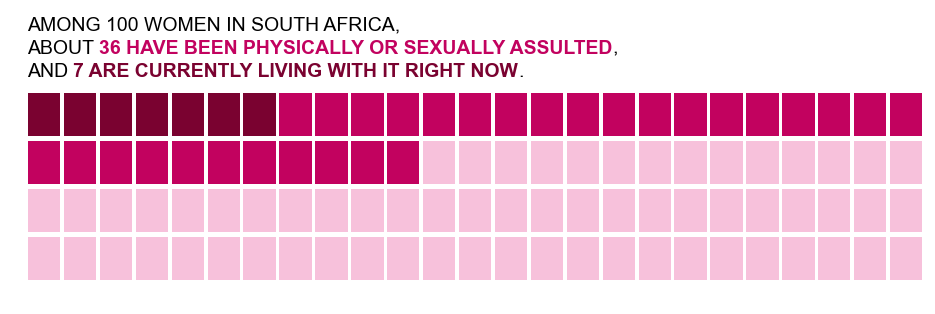

In [2]:
country_label = "South Africa"

# from earlier cells
lifetime_prevalence = 0.355
past_year_prevalence = 0.07

n_total = 100
n_lifetime = int(round(lifetime_prevalence * n_total))   # e.g. 36
n_current  = int(round(past_year_prevalence * n_total))  # e.g. 7
n_current  = min(n_current, n_lifetime)                  # safety

# grid layout: 4 rows x 25 cols = 100 squares
n_rows, n_cols = 4, 25
ids = np.arange(n_rows * n_cols)

df = pd.DataFrame({"id": ids})
# 0 = never, 1 = lifetime only, 2 = current
df["status"] = 0
df.loc[:n_lifetime - 1, "status"] = 1
df.loc[:n_current - 1, "status"]  = 2

df["row"] = df["id"] // n_cols
df["col"] = df["id"] % n_cols
df["row"] = n_rows - 1 - df["row"]  # flip so first row at top

# colours
bg_color       = "#ffffff"
never_color    = "#f7c1db"  # light pink
current_color = "#7A0230"  # dark maroon
lifetime_color = "#c2025f"  # bright pink
title_color    = "black"
subtitle_color = "#5D5D5D"

fig, ax = plt.subplots(figsize=(10, 3), facecolor=bg_color)
ax.set_facecolor(bg_color)

for spine in ax.spines.values():
    spine.set_visible(False)

square_size = 0.9
for _, r in df.iterrows():
    if r["status"] == 2:
        color = current_color
    elif r["status"] == 1:
        color = lifetime_color
    else:
        color = never_color

    rect = plt.Rectangle(
        (r["col"], r["row"]),
        square_size,
        square_size,
        facecolor=color,
        edgecolor=None,
        linewidth=0
    )
    ax.add_patch(rect)

ax.set_xlim(-0.5, n_cols)
ax.set_ylim(-0.5, n_rows)
ax.set_xticks([])
ax.set_yticks([])

# ---- TITLE WITH fig_text + HIGHLIGHTED BITS ----
title_string = (
    "AMONG 100 WOMEN IN SOUTH AFRICA,\n"
    f"ABOUT <{n_lifetime} HAVE BEEN PHYSICALLY OR SEXUALLY ASSULTED>,\n"
    f"AND <{n_current} ARE CURRENTLY LIVING WITH IT RIGHT NOW>."
)

fig_text(
    x=0.083,
    y=1.02,
    s=title_string,
    highlight_textprops=[
        {"color": lifetime_color, "weight": "bold"},  # first <...>
        {"color": current_color,  "weight": "bold"},  # second <...>
    ],
    color=title_color,        # base text colour
    fontsize=14,
    va="top",
    fig=fig,                  # make sure it draws on this figure
)

plt.tight_layout()
plt.savefig("img/dayX_exp_violence.png", dpi=300, bbox_inches="tight")
plt.show()


/var/folders/z1/szmsj4mj2_jgj9dx7p3cz92w0000gn/T/ipykernel_27956/4122455561.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(


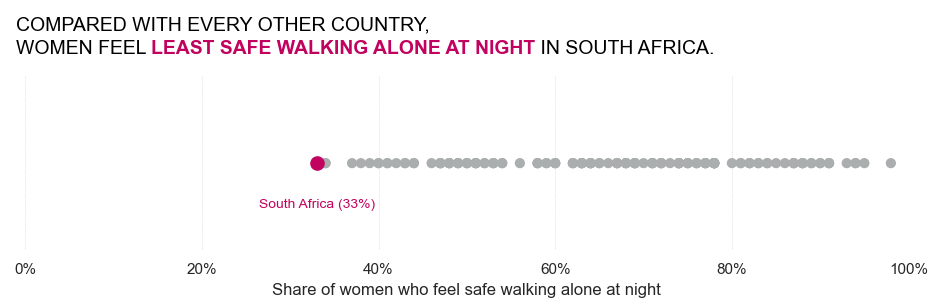

In [3]:
# How safe do women feel just walking home?

# Read your data
df = pd.read_excel("data/safe_walk_2024.xlsx")

# Make sure percentages are numeric (if your CSV still has % signs)
if df['safe_pct'].dtype == object:
    df['safe_pct'] = df['safe_pct'].str.rstrip('%').astype(float)

# Sort by value if you want left-to-right from least to most safe
df = df.sort_values('safe_pct')

# Colour: grey for everyone, red for South Africa
base_color = "#ABAEAE"   # teal-ish
highlight_color = "#c2025f"  # bright pink


colors = df['country'].apply(
    lambda c: highlight_color if c == "South Africa" else base_color
)

# Plot
fig, ax = plt.subplots(figsize=(10, 3))

# all dots on a single horizontal line at y=0
ax.scatter(df['safe_pct'], [0]*len(df), s=40, color=colors)

# emphasise South Africa with a bigger dot on top
sa = df[df['country'] == "South Africa"]
ax.scatter(sa['safe_pct'], [0], s=90, color=highlight_color, zorder=3)

ax.set_yticks([])  # no y-axis
ax.set_xlabel("Share of women who feel safe walking alone at night", fontsize=12)
ax.set_xlim(0, 100)
ax.set_xticklabels(
    ["0%", "20%", "40%", "60%", "80%", "100%"],
    fontsize=11,
)

# subtle gridlines
ax.xaxis.grid(True, linestyle=":", linewidth=0.5)
for spine in ax.spines.values():
    spine.set_visible(False)


title = (
    "COMPARED WITH EVERY OTHER COUNTRY,\n"
    "WOMEN FEEL <LEAST SAFE WALKING ALONE AT NIGHT> IN SOUTH AFRICA."
)

fig_text(
    x=0.07,
    y=1,
    s=title,
    highlight_textprops=[
        {"color": highlight_color, "weight": "bold"},
    ],
    color="black",
    fontsize=14,
    va="top",
    fig=fig,
)

# annotate South Africa
ax.text(
    sa['safe_pct'].iloc[0],
    -0.03,
    "South Africa (33%)",
    ha="center", va="bottom",
    fontsize=10,
    color=highlight_color
)

plt.tight_layout()
plt.savefig("img/dayX_feel_safe_global_dotplot.png", dpi=300, bbox_inches="tight")
plt.show()


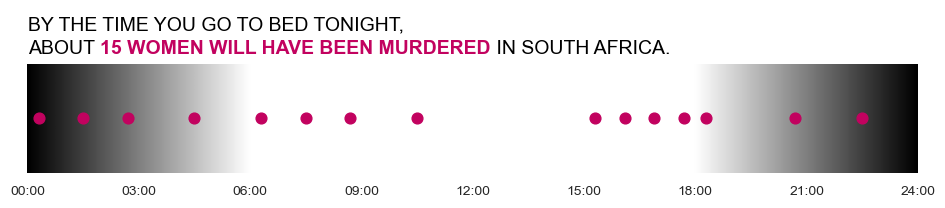

In [4]:
# NUMBER OF WOMEN MURDERED PER DAY

# --- parameters ---
annual_women_murdered = 5578  # 2023/24, women only
murders_per_day = annual_women_murdered / 365
murders_per_hour = murders_per_day / 24
hours_between = 1 / murders_per_hour
n_events = int(round(murders_per_day))   # ≈ 15 dots

# ---- TIME-OF-DAY DISTRIBUTION FROM SAPS TABLE (8 x 3-hour blocks) ----
# 00:00–02:59, 03:00–05:59, ..., 21:00–23:59
time_bin_totals = np.array([3023, 2171, 2825, 1719, 1555, 1984, 3620, 3678])
time_bin_probs = time_bin_totals / time_bin_totals.sum()

time_bins = np.array([
    (0, 3),
    (3, 6),
    (6, 9),
    (9, 12),
    (12, 15),
    (15, 18),
    (18, 21),
    (21, 24),
])

# -------- compute times *once* with a fixed seed --------
rng = np.random.default_rng(42)  # fixed seed for reproducibility

bin_counts = rng.multinomial(n_events, time_bin_probs)

event_times = []
for (start, end), k in zip(time_bins, bin_counts):
    if k == 0:
        continue
    margin = (end - start) * 0.1  # 10% padding
    if k == 1:
        times_in_bin = [start + (end - start) / 2]
    else:
        times_in_bin = np.linspace(start + margin, end - margin, k)
    event_times.extend(times_in_bin)

event_times = np.array(sorted(event_times))  # 👈 this is what Day 3 will reuse

# ---- plot Day 2 ----
bg_color        = "#ffffff"
dot_color       = "#c2025f"
text_color      = "#000000"
subtitle_color  = "#5D5D5D"

fig, ax = plt.subplots(figsize=(10, 2), facecolor=bg_color)
ax.set_facecolor(bg_color)

for spine in ax.spines.values():
    spine.set_visible(False)

# gradient background: dark night -> light day -> dark night
x = np.linspace(0, 24, 500)
brightness = np.zeros_like(x)
for i, t in enumerate(x):
    if t < 6:            # night to dawn
        brightness[i] = 0.2 + (t / 6) * 0.6
    elif t < 18:         # daytime
        brightness[i] = 0.8
    else:                # dusk to night
        brightness[i] = 0.8 - ((t - 18) / 6) * 0.6

gradient = np.tile(brightness, (2, 1))
ax.imshow(
    gradient,
    extent=[0, 24, -1, 1],
    origin="lower",
    aspect="auto",
    cmap="gray",
    zorder=0
)

# dots
ax.scatter(
    event_times,
    np.zeros_like(event_times),
    s=60,
    color=dot_color,
    zorder=2
)

ax.set_yticks([])
ax.set_ylim(-1, 1)
ax.set_xlim(0, 24)
ax.set_xticks([0, 3, 6, 9, 12, 15, 18, 21, 24])
ax.set_xticklabels(
    ["00:00", "03:00", "06:00", "09:00",
     "12:00", "15:00", "18:00", "21:00", "24:00"],
    fontsize=10,
)

title = (
    "BY THE TIME YOU GO TO BED TONIGHT,\n"
    f"ABOUT <{murders_per_day:.0f} WOMEN WILL HAVE BEEN MURDERED> IN SOUTH AFRICA."
)

fig_text(
    x=0.075,
    y=1,
    s=title,
    highlight_textprops=[
        {"color": dot_color, "weight": "bold"},
    ],
    color=text_color,
    fontsize=14,
    va="top",
    fig=fig,
)

plt.tight_layout()
plt.savefig("img/dayX_murders_time_of_day.png", dpi=300, bbox_inches="tight")
plt.show()


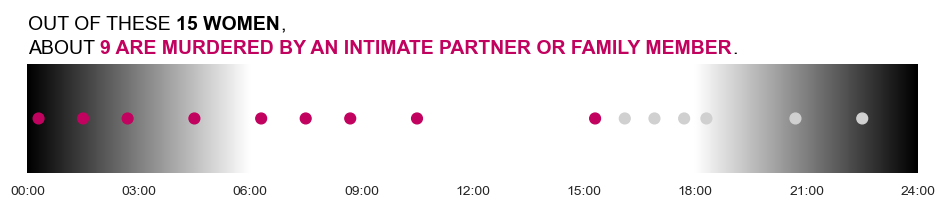

In [ ]:
# MOST WOMEN ARE MURDERED BY THEIR INTIMATE PARTNER

# 60% of women murdered globally are killed by an intimate partner or family member
n_ip_family = int(round(0.6 * n_events))
n_other     = n_events - n_ip_family

dot_color_ip    = "#c2025f"   # red – partner/family
dot_color_other = "#d0d0d0"   # light grey – other

colors = np.array([dot_color_other] * len(event_times))
colors[:n_ip_family] = dot_color_ip   # first 9 as IP/family; same times as Day 2

bg_color        = "#ffffff"
text_color      = "#000000"
subtitle_color  = "#5D5D5D"

fig, ax = plt.subplots(figsize=(10, 2), facecolor=bg_color)
ax.set_facecolor(bg_color)

for spine in ax.spines.values():
    spine.set_visible(False)

# same gradient background as Day 2
x = np.linspace(0, 24, 500)
brightness = np.zeros_like(x)
for i, t in enumerate(x):
    if t < 6:
        brightness[i] = 0.2 + (t / 6) * 0.6
    elif t < 18:
        brightness[i] = 0.8
    else:
        brightness[i] = 0.8 - ((t - 18) / 6) * 0.6

gradient = np.tile(brightness, (2, 1))
ax.imshow(
    gradient,
    extent=[0, 24, -1, 1],
    origin="lower",
    aspect="auto",
    cmap="gray",
    zorder=0
)

# same event_times, different colours
ax.scatter(
    event_times,
    np.zeros_like(event_times),
    s=60,
    color=colors,
    zorder=2
)

ax.set_yticks([])
ax.set_ylim(-1, 1)
ax.set_xlim(0, 24)
ax.set_xticks([0, 3, 6, 9, 12, 15, 18, 21, 24])
ax.set_xticklabels(
    ["00:00", "03:00", "06:00", "09:00",
     "12:00", "15:00", "18:00", "21:00", "24:00"],
    fontsize=10,
)

title = (
    f"OUT OF THESE <{n_events} WOMEN>,\n"
    f"ABOUT <{n_ip_family} WERE MURDERED BY AN INTIMATE PARTNER OR FAMILY MEMBER>."
)

fig_text(
    x=0.075,
    y=1,
    s=title,
    highlight_textprops=[
        {"color": text_color,   "weight": "bold"},   # <15 women>
        {"color": dot_color_ip, "weight": "bold"},   # <9 are killed...>
    ],
    color=text_color,
    fontsize=14,
    va="top",
    fig=fig,
)

plt.tight_layout()
plt.savefig("img/dayX_murders_who_kills.png", dpi=300, bbox_inches="tight")
plt.show()


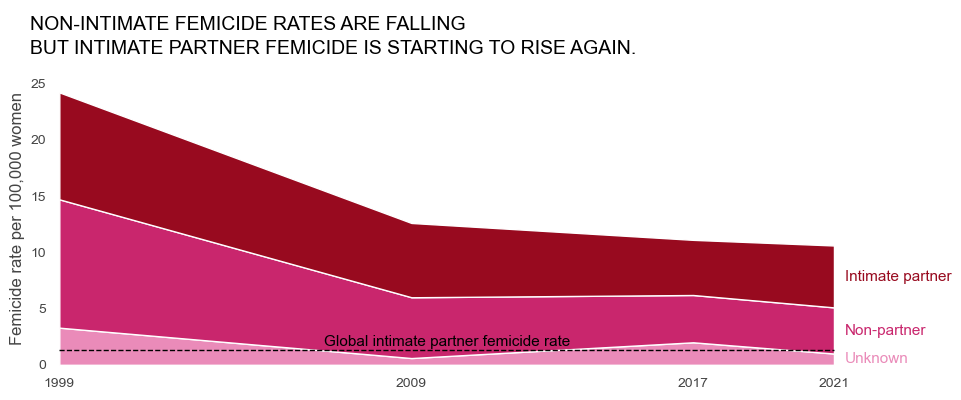

In [6]:
# ---- data (age-standardised rates per 100,000 women) ----
years = np.array([1999, 2009, 2017, 2021])  # last tick will be labelled "2020/21"

overall = np.array([24.2, 12.6, 11.1, 10.6])
ipf     = np.array([9.5, 6.6, 4.9, 5.5])
nipf    = np.array([11.4, 5.4, 4.2, 4.1])
other   = overall - ipf - nipf   # residual / unknown

# ---- colours ----
col_other = "#ea8bb9"   # light pink
col_nipf  = "#c9266d"   # mid pink
col_ipf   = "#980a1f"   # deep magenta/red

bg_color   = "#ffffff"
axis_color = "#444444"

fig, ax = plt.subplots(figsize=(10, 4), facecolor=bg_color)
ax.set_facecolor(bg_color)

for spine in ax.spines.values():
    spine.set_visible(False)

# stacked area
ax.stackplot(
    years,
    other, nipf, ipf,
    colors=[col_other, col_nipf, col_ipf]
)

ax.set_xlim(1999, 2022)  # extra space on the right for labels
ax.set_ylim(0, 26)

ax.set_xticks([1999, 2009, 2017, 2021])
ax.set_xticklabels(["1999", "2009", "2017", "2021"], fontsize=10)

ax.set_yticks([0, 5, 10, 15, 20, 25])
ax.set_yticklabels([0, 5, 10, 15, 20, 25], fontsize=10)
ax.set_ylabel("Femicide rate per 100,000 women", color=axis_color, fontsize=12)
ax.tick_params(axis="both", colors=axis_color)

# ---- global IP/family femicide reference line (1.3 per 100k) ----
global_ip_rate = 1.3
ax.hlines(y=global_ip_rate,
          xmin=1999,
          xmax=2021, 
          color="#000000", 
          linestyle="--", 
          linewidth=1,
          )

ax.text(
    2010, global_ip_rate + 0.1,
    "Global intimate partner femicide rate",
    va="bottom", ha="center",
    fontsize=11, color="#000000"
)

# ---- inline labels on the right-hand side ----
last_year_x = years[-1] + 0.3  # a bit to the right of 2020/21

other_last = other[-1]
nipf_last  = nipf[-1]
ipf_last   = ipf[-1]

# cumulative boundaries at 2020/21
bottom_other = 0
top_other    = other_last

bottom_nipf  = top_other
top_nipf     = top_other + nipf_last

bottom_ipf   = top_nipf
top_ipf      = top_nipf + ipf_last  # should equal overall[-1]

# midpoints for label positions
y_other = (bottom_other + top_other) / 2
y_nipf  = (bottom_nipf  + top_nipf)  / 2
y_ipf   = (bottom_ipf   + top_ipf)   / 2

ax.text(
    last_year_x, y_ipf,
    "Intimate partner",
    va="center", ha="left",
    fontsize=11, color=col_ipf
)
ax.text(
    last_year_x, y_nipf,
    "Non-partner",
    va="center", ha="left",
    fontsize=11, color=col_nipf
)
ax.text(
    last_year_x, y_other,
    "Unknown",
    va="center", ha="left",
    fontsize=11, color=col_other
)

# title using highlight_text
title = (
    "NON-INTIMATE FEMICIDE RATES ARE FALLING\n"
    "BUT INTIMATE PARTNER FEMICIDE IS STARTING TO RISE AGAIN."
)

fig_text(
    x=0.06,
    y=0.98,
    s=title,
    color="black",
    fontsize=14,
    va="top",
    fig=fig,
    highlight_textprops=None
)

plt.tight_layout()
plt.savefig("img/dayX_femicide_trends_stack.png", dpi=300, bbox_inches="tight")
plt.show()


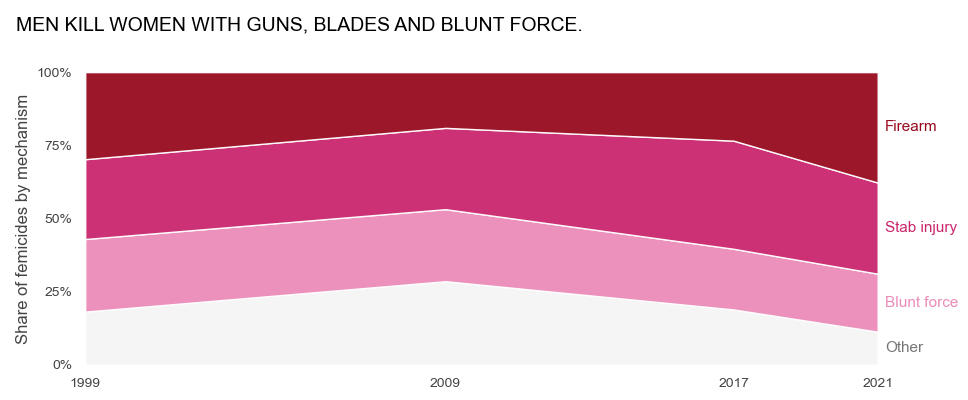

In [7]:

# ---- data: age-standardised rates per 100,000 women ----
years   = np.array([1999, 2009, 2017, 2021])
overall = np.array([24.2, 12.6, 11.1, 10.6])
firearm = np.array([7.2,  2.4,  2.6,  4.0])
stab    = np.array([6.6,  3.5,  4.1,  3.3])
blunt   = np.array([6.0,  3.1,  2.3,  2.1])

# residual "other / unknown"
other = overall - (firearm + stab + blunt)

# ---- shares of total femicide (0–1) ----
share_firearm = firearm / overall
share_stab    = stab    / overall
share_blunt   = blunt   / overall
share_other   = other   / overall

# ---- colours ----
col_firearm = "#980a1f"   # deep red
col_stab    = "#c9266d"   # mid pink
col_blunt   = "#ea8bb9"   # light pink
col_other   = "#f5f5f5"   # very light grey
bg_color    = "#ffffff"
axis_color  = "#444444"
subtitle_color = "#5D5D5D"

fig, ax = plt.subplots(figsize=(10, 4), facecolor=bg_color)
ax.set_facecolor(bg_color)

for spine in ax.spines.values():
    spine.set_visible(False)

# ---- 100% stacked areas (shares) ----
ax.stackplot(
    years,
    share_other,
    share_blunt,
    share_stab,
    share_firearm,
    colors=[col_other, col_blunt, col_stab, col_firearm],
    alpha=0.95
)

ax.set_xlim(1999, 2021)
ax.set_ylim(0, 1)

ax.set_xticks([1999, 2009, 2017, 2021])
ax.set_xticklabels(["1999", "2009", "2017", "2021"], fontsize=10)

ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
ax.set_yticklabels(["0%", "25%", "50%", "75%", "100%"], fontsize=10)
ax.set_ylabel("Share of femicides by mechanism", color=axis_color, fontsize=12)
ax.tick_params(axis="both", colors=axis_color)

# inline labels at right
x_label = 2021.2

# values at final year for label positioning
sf_last = share_firearm[-1]
ss_last = share_stab[-1]
sb_last = share_blunt[-1]
so_last = share_other[-1]

# cumulative boundaries at 2020/21
bottom_other = 0
top_other    = so_last

bottom_blunt = top_other
top_blunt    = top_other + sb_last

bottom_stab  = top_blunt
top_stab     = top_blunt + ss_last

bottom_fire  = top_stab
top_fire     = top_stab + sf_last  # should be 1.0

ax.text(
    x_label, (bottom_fire + top_fire)/2,
    "Firearm",
    va="center", ha="left",
    fontsize=11, color=col_firearm
)
ax.text(
    x_label, (bottom_stab + top_stab)/2,
    "Stab injury",
    va="center", ha="left",
    fontsize=11, color=col_stab
)
ax.text(
    x_label, (bottom_blunt + top_blunt)/2,
    "Blunt force",
    va="center", ha="left",
    fontsize=11, color=col_blunt
)
ax.text(
    x_label, (bottom_other + top_other)/2,
    "Other",
    va="center", ha="left",
    fontsize=11, color="#777777"
)

# title
title = (
    "MEN KILL WOMEN WITH GUNS, BLADES AND BLUNT FORCE."
)

fig_text(
    x=0.04,
    y=0.98,
    s=title,
    color="black",
    fontsize=14,
    va="top",
    fig=fig,
)

plt.tight_layout()
plt.savefig("img/dayX_how_are_women_killed_shares.png", dpi=300, bbox_inches="tight")
plt.show()


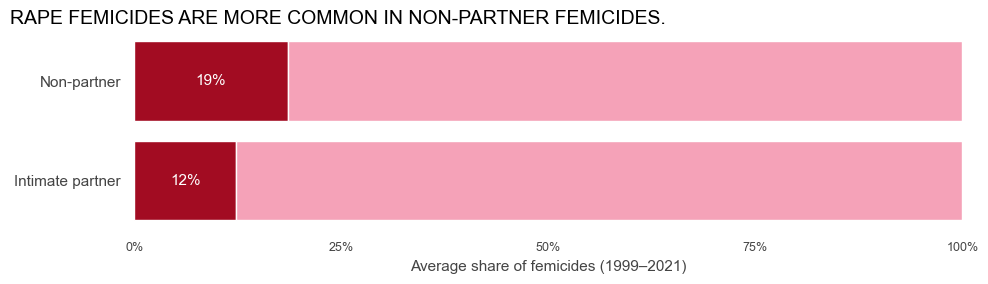

In [8]:

t6 = pd.read_csv("data/convictions.csv")

def point_estimate(s):
    if isinstance(s, str):
        token = s.split()[0].strip("()")
        try:
            return float(token)
        except ValueError:
            return np.nan
    return np.nan

years = np.array([1999, 2009, 2017, 2020])
IPF_cols  = ["Intimate partner femicide", "Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]
NIPF_cols = ["Non-intimate partner femicide", "Unnamed: 6", "Unnamed: 7", "Unnamed: 8"]

row_rape = t6[t6["Characteristic"] == "Rape femicides"].iloc[0]
ipf_rape  = np.array([point_estimate(row_rape[c]) for c in IPF_cols])
nipf_rape = np.array([point_estimate(row_rape[c]) for c in NIPF_cols])

# ---- 1. Compute average rape-femicide share across all 4 surveys ----
mean_ipf_rape  = np.nanmean(ipf_rape)   # %
mean_nipf_rape = np.nanmean(nipf_rape)  # %

# Rape vs not-rape shares (must sum to 100)
ipf_rape_share   = mean_ipf_rape
ipf_not_rape     = 100 - mean_ipf_rape

nipf_rape_share  = mean_nipf_rape
nipf_not_rape    = 100 - mean_nipf_rape

# ---- 2. Prepare data for horizontal 100% stacked bars ----
labels = ["Intimate partner", "Non-partner"]
rape_values     = np.array([ipf_rape_share,  nipf_rape_share])
not_rape_values = np.array([ipf_not_rape,    nipf_not_rape])

y_pos = np.arange(len(labels))

# ---- 3. Plot ----
bg_color       = "#ffffff"
rape_color     = "#a20c22"  # dark red
not_rape_color = "#f5a2b8"  # lighter red
axis_color     = "#444444"
subtitle_color = "#5D5D5D"

fig, ax = plt.subplots(figsize=(10, 3), facecolor=bg_color)
ax.set_facecolor(bg_color)

for spine in ax.spines.values():
    spine.set_visible(False)

# 100% stacked horizontal bars
ax.barh(y_pos, rape_values,     color=rape_color,     height=0.8, label="Includes rape")
ax.barh(y_pos, not_rape_values, left=rape_values,
        color=not_rape_color, height=0.8, label="No evidence of rape")

ax.set_yticks(y_pos)
ax.set_yticklabels(labels, fontsize=11)
ax.set_xlim(0, 100)
ax.set_xticks([0, 25, 50, 75, 100])
ax.set_xticklabels(["0%", "25%", "50%", "75%", "100%"], fontsize=9)
ax.tick_params(axis="x", colors=axis_color)
ax.tick_params(axis="y", colors=axis_color)

ax.set_xlabel("Average share of femicides (1999–2021)", fontsize=11, color=axis_color)

# Value labels inside the rape segment
for y, rv in zip(y_pos, rape_values):
    ax.text(
        rv / 2,
        y,
        f"{rv:.0f}%",
        ha="center", va="center",
        fontsize=11,
        color="white"
    )

# Title and subtitle
ax.set_title(
    "RAPE FEMICIDES ARE MORE COMMON IN NON-PARTNER FEMICIDES.",
    x=-0.15,
    y=1,
    loc="left",
    fontsize=14,
    color="black"
)

plt.tight_layout()
plt.savefig("img/dayX_rape_femicides_avg.png", dpi=300, bbox_inches="tight")
plt.show()

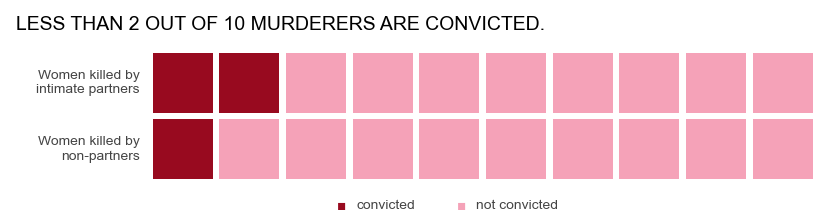

In [9]:
# ---- parameters ----
n_cols = 10
ipf_convicted  = 2   # out of 10
nipf_convicted = 1   # out of 10

# build grid: row_center 1 = IPF (top), 0 = NIPF (bottom)
row_centers = np.repeat([1, 0], n_cols)        # [1,1,...,0,0,...]
cols        = np.tile(np.arange(n_cols), 2)

# status: 1 = convicted, 0 = not convicted
status_ipf  = [1]*ipf_convicted  + [0]*(n_cols - ipf_convicted)
status_nipf = [1]*nipf_convicted + [0]*(n_cols - nipf_convicted)
status      = status_ipf + status_nipf

df = pd.DataFrame({
    "row_center": row_centers,
    "col": cols,
    "status": status
})

# ---- colours ----
bg_color        = "#ffffff"
convicted_color = "#980a1f"   # dark red
not_conv_color  = "#f5a2b8"   # light pink
title_color     = "black"
subtitle_color  = "#5D5D5D"

fig, ax = plt.subplots(figsize=(10, 4), facecolor=bg_color)
ax.set_facecolor(bg_color)

# space for title + subtitle
fig.subplots_adjust(left=0.15, right=0.97, top=0.7, bottom=0.3)

for spine in ax.spines.values():
    spine.set_visible(False)

square_size = 0.9

for _, r in df.iterrows():
    color = convicted_color if r["status"] == 1 else not_conv_color
    # draw squares centred on row_center
    y0 = r["row_center"] - square_size / 2
    rect = plt.Rectangle(
        (r["col"], y0),
        square_size,
        square_size,
        facecolor=color,
        edgecolor=None,
        linewidth=0
    )
    ax.add_patch(rect)

# make them square & add margins so nothing is cut off
ax.set_xlim(-0.8, n_cols - 0.1)   # extra space on right and left
ax.set_ylim(-0.7, 1.7)
ax.set_aspect("equal")
ax.set_xticks([])
ax.set_yticks([])

# ---- row labels, pulled closer to the squares ----
label_x = -0.2
ax.text(
    label_x, 1,
    "Women killed by\nintimate partners",
    ha="right", va="center",
    fontsize=10, color="#444444"
)
ax.text(
    label_x, 0,
    "Women killed by\nnon-partners",
    ha="right", va="center",
    fontsize=10, color="#444444"
)

# ---- legend centred below the blocks ----
center_x = (n_cols - 1) / 2
legend_y = -0.4

# convicted (further left)
conv_icon_x = center_x - 1.6
conv_text_x = conv_icon_x + 0.15

ax.text(conv_icon_x, legend_y -0.45, "■", color=convicted_color,
        ha="right", va="center", fontsize=11)
ax.text(conv_text_x, legend_y -0.45, "convicted",
        ha="left", va="center", fontsize=10, color="#444444")

# not convicted (to the right)
not_icon_x = center_x + 0.2
not_text_x = not_icon_x + 0.15

ax.text(not_icon_x, legend_y -0.45, "■", color=not_conv_color,
        ha="right", va="center", fontsize=11)
ax.text(not_text_x, legend_y -0.45, "not convicted",
        ha="left", va="center", fontsize=10, color="#444444")



# ---- title ----
title = "LESS THAN 2 OUT OF 10 MURDERERS ARE CONVICTED."
fig_text(
    x=0.12,
    y=0.75,
    s=title,
    color=title_color,
    fontsize=14,
    va="top",
    fig=fig,
)

plt.savefig("img/dayX_convictions.png", dpi=300, bbox_inches="tight")
plt.show()


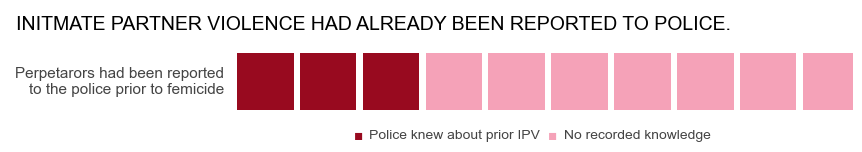

In [10]:
# --- parameters ---
n_cols = 10
known_prior_ipv = 3   # out of 10

row_center = 0  # single row

cols   = np.arange(n_cols)
rows   = np.full(n_cols, row_center)
status = [1]*known_prior_ipv + [0]*(n_cols - known_prior_ipv)  # 1 = known, 0 = not known

df = pd.DataFrame({
    "row_center": rows,
    "col": cols,
    "status": status
})

# --- colours (match your palette) ---
bg_color        = "#ffffff"
known_color     = "#980a1f"   # dark red: police knew
unknown_color   = "#f5a2b8"   # light pink: police did not know
title_color     = "black"
subtitle_color  = "#5D5D5D"

fig, ax = plt.subplots(figsize=(10, 2.2), facecolor=bg_color)
ax.set_facecolor(bg_color)

# some space for title / subtitle
fig.subplots_adjust(left=0.15, right=0.97, top=0.7, bottom=0.3)

for spine in ax.spines.values():
    spine.set_visible(False)

square_size = 0.9

for _, r in df.iterrows():
    color = known_color if r["status"] == 1 else unknown_color
    y0 = r["row_center"] - square_size / 2
    rect = plt.Rectangle(
        (r["col"], y0),
        square_size,
        square_size,
        facecolor=color,
        edgecolor=None,
        linewidth=0
    )
    ax.add_patch(rect)

# axes & layout
ax.set_xlim(-0.6, n_cols - 0.2)
ax.set_ylim(-0.7, 0.7)
ax.set_aspect("equal")
ax.set_xticks([])
ax.set_yticks([])

# left label
ax.text(
    -0.2, 0,
    "Perpetarors had been reported\nto the police prior to femicide",
    ha="right", va="center",
    fontsize=11, color="#444444"
)

# legend under blocks
center_x = (n_cols - 1) / 2
legend_y = -0.85

# known prior IPV
ax.text(center_x - 2.5, legend_y, "■", color=known_color,
        ha="right", va="center", fontsize=11)
ax.text(center_x - 2.4, legend_y, "Police knew about prior IPV",
        ha="left", va="center", fontsize=10, color="#444444")

# unknown
ax.text(center_x + 0.6, legend_y, "■", color=unknown_color,
        ha="right", va="center", fontsize=11)
ax.text(center_x + 0.7, legend_y, "No recorded knowledge",
        ha="left", va="center", fontsize=10, color="#444444")

# title & subtitle
title = "INITMATE PARTNER VIOLENCE HAD ALREADY BEEN REPORTED TO POLICE."
fig_text(
    x=0.05,
    y=0.8,
    s=title,
    color=title_color,
    fontsize=14,
    va="top",
    fig=fig,
)

plt.savefig("img/dayX_prior_ipv_knowledge.png", dpi=300)
plt.show()


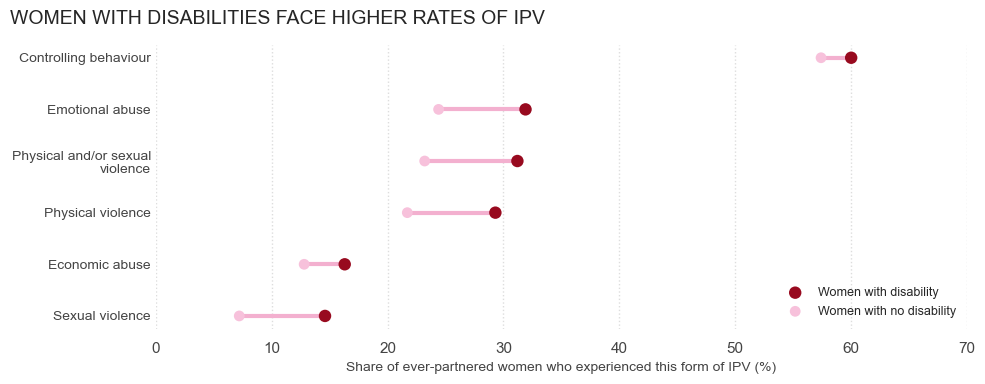

In [ ]:
# -------- data from section 4.3 (ever-partnered women) --------
# Format: with_disability vs no_disability (lifetime from a partner)
data = {
    "category": [
        "Physical violence",
        "Physical and/or sexual\nviolence",
        "Sexual violence",
        "Emotional abuse",
        "Economic abuse",
        "Controlling behaviour"
    ],
    "with_disability":    [29.3, 31.2, 14.6, 31.9, 16.3, 60.0],
    "no_disability":      [21.7, 23.2,  7.2, 24.4, 12.8, 57.4],
}

df = pd.DataFrame(data)

# sort by prevalence among women with disability (so biggest at top)
df = df.sort_values("with_disability", ascending=True).reset_index(drop=True)

y_pos = np.arange(len(df))

# -------- styling --------
bg_color         = "#ffffff"
line_color       = "#f3b0cf"
dis_color        = "#980a1f"   # women with disability (dark red)
nodis_color      = "#f7c1db"   # women without disability (light pink)
axis_color       = "#444444"
grid_color       = "#dddddd"
subtitle_color   = "#5D5D5D"

fig, ax = plt.subplots(figsize=(10, 4), facecolor=bg_color)
ax.set_facecolor(bg_color)

for spine in ax.spines.values():
    spine.set_visible(False)

# lollipop sticks between no_disability and with_disability
for i, row in df.iterrows():
    x1 = row["no_disability"]
    x2 = row["with_disability"]
    # ensure line always goes left→right
    xmin, xmax = sorted([x1, x2])

    ax.hlines(
        y=y_pos[i],
        xmin=xmin,
        xmax=xmax,
        color=line_color,
        linewidth=3,
        zorder=1
    )

    # dot: women with disability
    ax.scatter(
        row["with_disability"],
        y_pos[i],
        s=80,
        color=dis_color,
        edgecolor="none",
        zorder=3,
        label="Women with disability" if i == 0 else None
    )

    # dot: women with no disability
    ax.scatter(
        row["no_disability"],
        y_pos[i],
        s=60,
        color=nodis_color,
        edgecolor="none",
        zorder=3,
        label="Women with no disability" if i == 0 else None
    )

# axes & labels
ax.set_yticks(y_pos)
ax.set_yticklabels(df["category"], fontsize=10, color=axis_color)

ax.set_xlabel("Share of ever-partnered women who experienced this form of IPV (%)",
              fontsize=10, color=axis_color)

# leave a bit of space beyond the max value (60%)
ax.set_xlim(0, 70)

ax.xaxis.grid(True, linestyle=":", color=grid_color)
ax.tick_params(axis="x", colors=axis_color)
ax.tick_params(axis="y", length=0)

# legend (deduplicate labels)
handles, labels = ax.get_legend_handles_labels()
unique = dict(zip(labels, handles))
ax.legend(
    unique.values(),
    unique.keys(),
    loc="lower right",
    frameon=False,
    fontsize=9
)

title = "WOMEN WITH DISABILITIES FACE HIGHER RATES OF IPV"
ax.set_title(title, fontsize=14, pad=15, x=0.15)

plt.tight_layout()
plt.savefig("img/dayX_women_disability_ipv_lollipop.png", dpi=300, bbox_inches="tight")
plt.show()


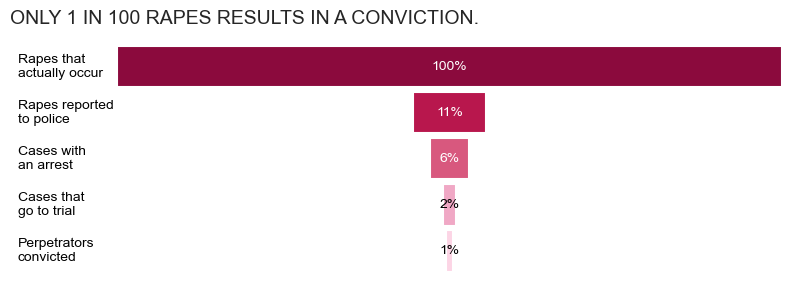

In [12]:
# ---------- pipeline numbers (illustrative but evidence-based) ----------
stages = [
    "Rapes that\nactually occur",
    "Rapes reported\nto police",
    "Cases with\nan arrest",
    "Cases that\ngo to trial",
    "Perpetrators\nconvicted"
]

values = np.array([100, 11, 6, 2, 1], dtype=float)   # out of 100 rapes that occur
percents = values / values[0] * 100

# colours from dark → light
colors = ["#8B0A3D", "#B8174D", "#D8587E", "#F0A8C5", "#FCD5E5"]

bg_color       = "#ffffff"
text_color     = "#000000"
subtitle_color = "#5D5D5D"

fig, ax = plt.subplots(figsize=(8, 3), facecolor=bg_color)
ax.set_facecolor(bg_color)

for spine in ax.spines.values():
    spine.set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

y = np.arange(len(stages))[::-1]
max_width = values[0]

for i, (stage, val, pct, col, yi) in enumerate(zip(stages, values, percents, colors, y)):
    left = -val / 2
    ax.barh(
        yi,
        width=val,
        height=0.9,
        left=left,
        color=col,
        edgecolor="white",
        linewidth=1.5,
        zorder=2
    )

    # move labels closer to bar (e.g. just left of the longest bar)
    ax.text(
        -max_width * 0.65,   # was -0.8
        yi,
        stage,
        ha="left", va="center",
        fontsize=10,
        color=text_color
    )

    ax.text(
        0, yi,
        f"{pct:.0f}%",
        ha="center", va="center",
        fontsize=10,
        color="white" if i <= 2 else text_color,
    )

# tighten the left limit so there's not tons of empty space
ax.set_xlim(-max_width * 0.65, max_width * 0.5)
ax.set_ylim(-0.5, len(stages) - 0.5)

# title & subtitle
ax.set_title(
    "ONLY 1 IN 100 RAPES RESULTS IN A CONVICTION.",
    fontsize=14, loc="left", pad=14, x=-0.01
)

plt.tight_layout()
plt.savefig("img/dayX_rape_funnel.png", dpi=300, bbox_inches="tight")
plt.show()


# Based on older but still widely-cited research, for roughly 100 rapes that happen in South Africa, only about 11 are reported to the police. 
# Of those reported cases, around half lead to an arrest and about 6% end in conviction. This means only about 1 in 100 rapes results in a conviction. 
# Figures are approximate and come from the MRC “1 in 9” reporting estimate and the Tracking Justice study of rape attrition in Gauteng.


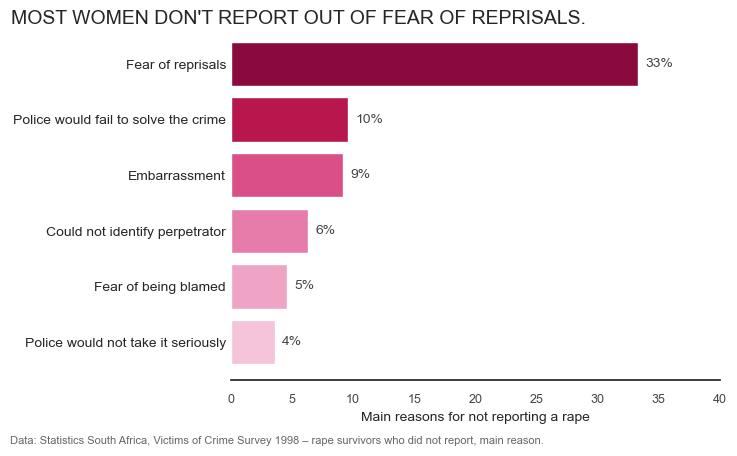

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# ---- Data: main reasons for NOT reporting rape to police (Stats SA 1998) ----
labels = [
    "Fear of reprisals",
    "Police would fail to solve the crime",
    "Embarrassment",
    "Could not identify perpetrator",
    "Fear of being blamed",
    "Police would not take it seriously",
]

values = np.array([33.3, 9.6, 9.2, 6.3, 4.6, 3.6])

# sort descending
order = np.argsort(values)[::-1]
labels = [labels[i] for i in order]
values = values[order]

bg_color   = "#ffffff"
axis_color = "#444444"

# colour gradient: darkest for fear of reprisals
palette = ["#8B0A3D", "#B8174D", "#D94F86", "#E57CA9", "#EFA4C5", "#F5C3DA", "#F0E4EE", "#E0D6E0"]
colors = [palette[i] for i in range(len(values))]

fig, ax = plt.subplots(figsize=(7.5, 4.5), facecolor=bg_color)
ax.set_facecolor(bg_color)

y = np.arange(len(labels))

ax.barh(y, values, color=colors)

# labels on y-axis
ax.set_yticks(y)
ax.set_yticklabels(labels, fontsize=10)
ax.invert_yaxis()  # highest at top

# remove spines except bottom
for spine_name, spine in ax.spines.items():
    if spine_name in ["left", "right", "top"]:
        spine.set_visible(False)
ax.tick_params(axis="y", length=0)
ax.tick_params(axis="x", colors=axis_color, labelsize=9)

ax.set_xlim(0, 40)
ax.set_xlabel("Main reasons for not reporting a rape", fontsize=10)

# add % labels at end of bars
for yi, v in zip(y, values):
    ax.text(v + 0.6, yi, f"{v:.0f}%", va="center", ha="left", fontsize=10, color=axis_color)

# title + subtitle
ax.set_title(
    "MOST WOMEN DON'T REPORT OUT OF FEAR OF REPRISALS.",
    fontsize=14,
    loc="left",
    pad=14,
    x=-0.45,
    y=0.95
)

fig.text(
    0.02, -0.01,
    "Data: Statistics South Africa, Victims of Crime Survey 1998 – rape survivors who did not report, main reason.",
    ha="left", va="bottom",
    fontsize=8,
    color="#666666"
)

plt.tight_layout()
plt.savefig("img/dayX_why_not_report_bars.png", dpi=300, bbox_inches="tight")
plt.show()


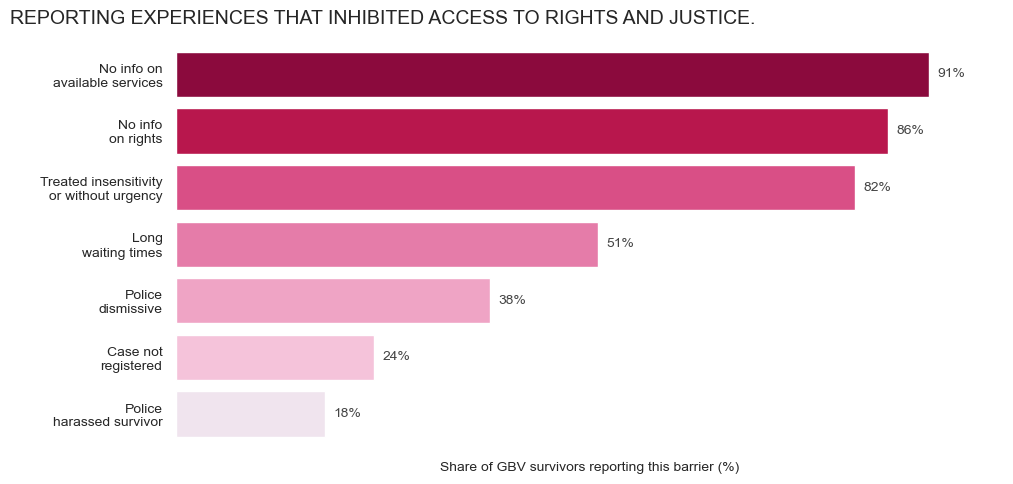

In [14]:

# ---- CFJ 2025: Barriers to justice & services for GBV survivors (Western Cape) ----
barriers = [
    "No info on\navailable services",     # 91%
    "No info\non rights",       # 86%
    "Treated insensitivity\n or without urgency",# 82%
    "Long\nwaiting times",      # 51%
    "Police\ndismissive",       # 38%
    "Case not\nregistered",     # 24%
    "Police\nharassed survivor" # 18%
]

values = np.array([91, 86, 82, 51, 38, 24, 18])

# sort descending just in case you want to tweak later
order = np.argsort(values)[::-1]
barriers = [barriers[i] for i in order]
values   = values[order]

bg_color   = "#ffffff"
axis_color = "#444444"
palette = ["#8B0A3D", "#B8174D", "#D94F86", "#E57CA9", "#EFA4C5", "#F5C3DA", "#F0E4EE"]
colors = [palette[i] for i in range(len(values))]

fig, ax = plt.subplots(figsize=(10, 5), facecolor=bg_color)
ax.set_facecolor(bg_color)

y = np.arange(len(barriers))

ax.barh(y, values, color=colors)

# y labels
ax.set_yticks(y)
ax.set_yticklabels(barriers, fontsize=10)
ax.invert_yaxis()  # largest at top

# remove clutter
for spine_name, spine in ax.spines.items():
    if spine_name in ["top", "right", "left", "bottom"]:
        spine.set_visible(False)

ax.tick_params(axis="y", which="both", left=False)
ax.tick_params(axis="x", which="both", left=False, bottom=False, top=False, labelbottom=False)

ax.set_xlim(0, 100)
ax.set_xlabel("Share of GBV survivors reporting this barrier (%)", fontsize=10)

# add value labels
for yi, v in zip(y, values):
    ax.text(v + 1, yi, f"{v:.0f}%", va="center", ha="left", fontsize=10, color=axis_color)

# title + source
ax.set_title(
    "REPORTING EXPERIENCES THAT INHIBITED ACCESS TO RIGHTS AND JUSTICE.",
    fontsize=14,
    loc="left",
    x=-0.2
)

plt.tight_layout()
plt.savefig("img/dayX_barriers_services.png", dpi=300, bbox_inches="tight")
plt.show()

# source: Clooney Foundation for Justice, 'Barriers to Justice: Gender-Based Violence in South Africa' (2025)


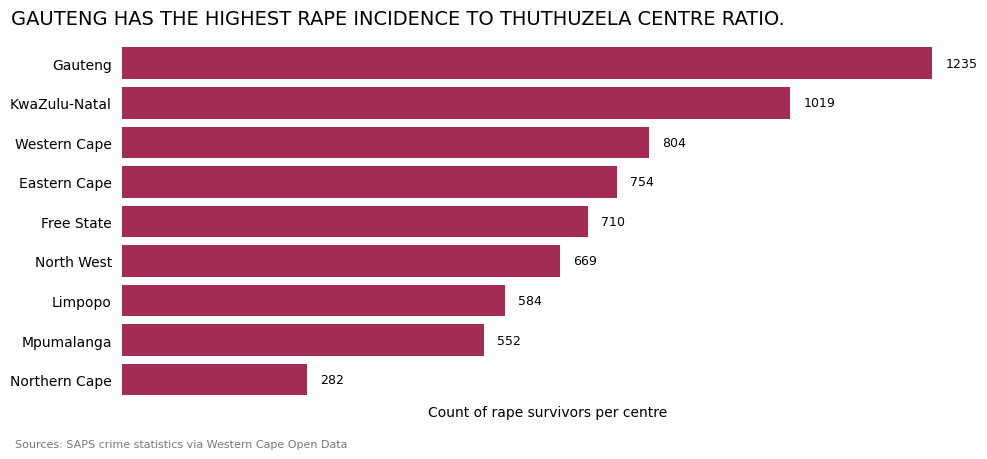

In [15]:
# ---------- load sexual offences dataset ----------
df = pd.read_csv(
    "data/Sexual_Offence_Crimes_Reported_per_province_2014-2024.csv",
    sep=";"
)

# keep provincial rape counts for latest year
rape = df[
    (df["Crime Category"] == "Rape")
    & (df["Province"] != "Republic of South Africa")
].copy()

# --- Thuthuzela Care Centre counts (approx. 2021) ---
# Source: Parliamentary reply on TCCs via Spotlight, 2021
tcc_counts = {
    "Eastern Cape":   9,
    "Free State":     4,
    "Gauteng":        7,
    "KwaZulu-Natal":  8,
    "Limpopo":        7,
    "Mpumalanga":     5,
    "North West":     5,
    "Northern Cape":  4,
    "Western Cape":   6,
}

rape["TCCs"] = rape["Province"].map(tcc_counts)

# drop provinces where we don't (yet) have a TCC count
rape = rape.dropna(subset=["TCCs"]).copy()

# compute ratio for 2023/24
rape["cases_per_TCC"] = rape["2023/2024"] / rape["TCCs"]

# sort for plotting
plot_df = rape[["Province", "cases_per_TCC"]].sort_values(
    "cases_per_TCC", ascending=False
)

# ---------- plotting ----------
bg_color = "#ffffff"
color = "#B8174D" 
text_color = "#000000"

plt.style.use("default")
fig, ax = plt.subplots(figsize=(10, 5), facecolor=bg_color)
ax.set_facecolor(bg_color)


sns.barplot(
    data=plot_df,
    y="Province",
    x="cases_per_TCC",
    color=color,
    ax=ax
)

ax.tick_params(axis="y", which="both", left=False)
ax.tick_params(axis="x", which="both", left=False, bottom=False, top=False, labelbottom=False)


# tidy axes
for spine in ax.spines.values():
    spine.set_visible(False)

ax.set_xlabel("Count of rape survivors per centre", fontsize=10)
ax.set_ylabel("")
ax.set_title(
    "GAUTENG HAS THE HIGHEST RAPE INCIDENCE TO THUTHUZELA CENTRE RATIO.",
    fontsize=14,
    loc="left",
    pad=14,
    x=-0.13
)

# add value labels
for i, (val) in enumerate(plot_df["cases_per_TCC"]):
    ax.text(
        val + 20, i,
        f"{val:.0f}",
        va="center", ha="left",
        fontsize=9, color=text_color
    )

fig.text(
    0.02, 0.02,
    "Sources: SAPS crime statistics via Western Cape Open Data",
    ha="left", va="bottom",
    fontsize=8, color="#777777"
)

plt.tight_layout(rect=[0, 0.05, 1, 0.93])
plt.savefig("img/dayX_rape_per_TCC_by_province.png", dpi=300, bbox_inches="tight")
plt.show()


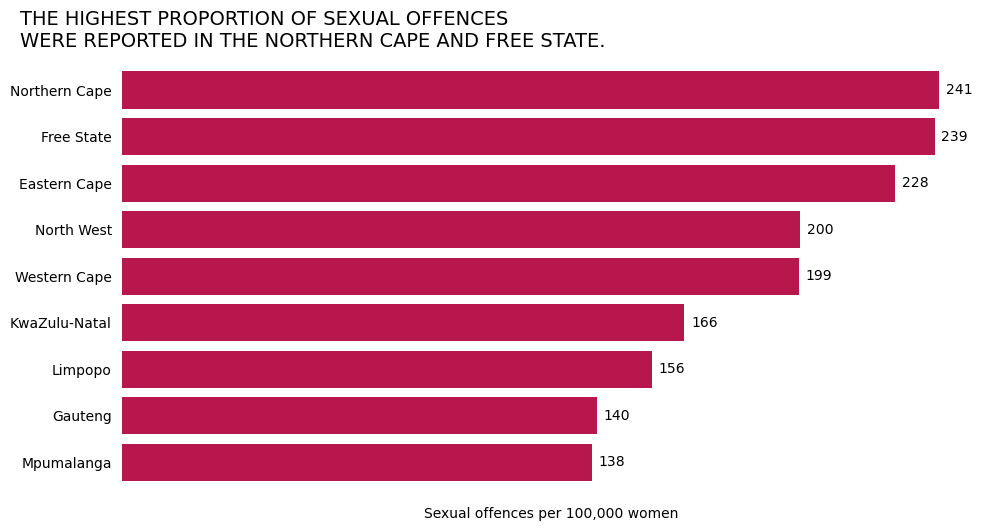

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Load the data ---
import pandas as pd

df = pd.read_csv(
    "data/Sexual_Offence_Crimes_Reported_per_province_2014-2024.csv",
    sep=";",          # 👈 this is the key bit
    engine="python",  # sometimes safer with semicolons
)

year_col = "2023/2024"

# Offence categories we want to include
offence_types = [
    "Rape",
    "Sexual assault",
    "Attempted sexual offences",
    "Contact sexual offences"
]

# --- 2. Total sexual offences per province for 2023/2024 ---
prov_df = (
    df[
        (df["Crime Category"].isin(offence_types)) &
        (df["Province"] != "Republic of South Africa")  # drop national row
    ]
    .groupby("Province")[year_col]
    .sum()
    .reset_index()
    .rename(columns={year_col: "total_sexual_offences"})
)


# --- 3. Female population per province (you fill these numbers) ---
female_pop = pd.DataFrame({
    "Province": [
        "Eastern Cape",
        "Free State",
        "Gauteng",
        "KwaZulu-Natal",
        "Limpopo",
        "Mpumalanga",
        "North West",
        "Northern Cape",
        "Western Cape"
    ],
    "female_population": [
        3557567,  # Eastern Cape
        1514385,  # Free State
        7733504,  # Gauteng
        6015451,  # KwaZulu-Natal
        3078423,  # Limpopo
        2372580,  # Mpumalanga
        2018143,  # North West
        652280,  # Northern Cape
        3551142,  # Western Cape
    ]
})

# --- 4. Merge offences with population ---
merged = prov_df.merge(female_pop, on="Province", how="left")

# safety check
assert merged["female_population"].isna().sum() == 0, "Fill all female_population values first!"

# --- 5. Rate per 100k women ---
merged["offences_per_100k_women"] = (
    merged["total_sexual_offences"] / merged["female_population"] * 100_000
)

# Sort for plotting (highest rate first)
merged = merged.sort_values("offences_per_100k_women", ascending=False)
merged

# National rate using the same provinces’ totals & populations
nat_total = merged["total_sexual_offences"].sum()
nat_female_pop = merged["female_population"].sum()
nat_rate = nat_total / nat_female_pop * 100_000
nat_rate

# --- 6. Plot: sexual offences per 100k women by province ---
color = "#B8174D"

fig, ax = plt.subplots(figsize=(10, 5))

for spine in ax.spines.values():
    spine.set_visible(False)



y = np.arange(len(merged))
ax.barh(y, merged["offences_per_100k_women"], color=color)
ax.set_yticks(y)
ax.set_yticklabels(merged["Province"])
ax.invert_yaxis()

ax.tick_params(axis="y", which="both", left=False)

ax.set_xticks([])

ax.set_xlabel("Sexual offences per 100,000 women")
pos = ax.get_position()

fig.text(
    pos.x0 - 0.1,  # left edge of the axes
    pos.y1 + 0.09,  # a bit above the axes
    "THE HIGHEST PROPORTION OF SEXUAL OFFENCES\n"
    "WERE REPORTED IN THE NORTHERN CAPE AND FREE STATE.",
    ha="left", va="bottom",
    fontsize=14
)

# value labels
for yi, v in zip(y, merged["offences_per_100k_women"]):
    ax.text(v + 2, yi, f"{v:.0f}", va="center")


plt.tight_layout()
plt.savefig("img/dayX_sexual_offences_per_100k_women.png", dpi=300, bbox_inches="tight")
plt.show()




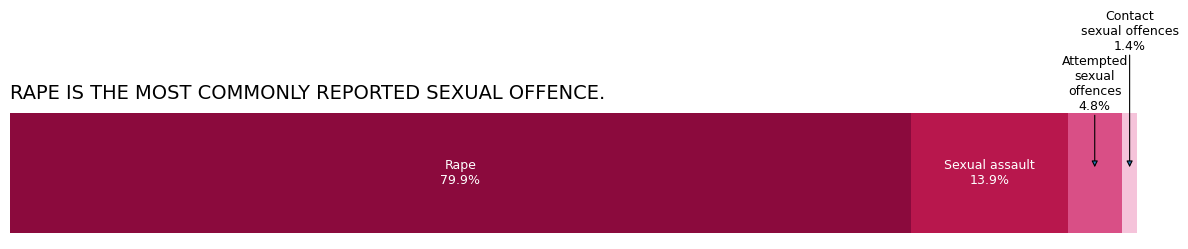

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Data for South Africa, 2023/24
categories = [
    "Rape",
    "Sexual assault",
    "Attempted\nsexual\noffences",
    "Contact\nsexual offences",
]
values = np.array([42569, 7418, 2558, 740], dtype=float)

total = values.sum()
shares = values / total * 100  # proportions in %

colors = ["#8B0A3D", "#B8174D", "#D94F86", "#F5C3DA"]

fig, ax = plt.subplots(figsize=(12, 3), facecolor="white")

for spine in ax.spines.values():
    spine.set_visible(False)

left = 0
y_pos = 0

# counter for small segments so we can stagger labels
small_idx = 0

for i, (cat, val, share, col) in enumerate(zip(categories, values, shares, colors)):
    ax.barh(
        y_pos,
        share,
        left=left,
        height=0.6,
        color=col
    )

    x_center = left + share / 2
    label_text = f"{cat}\n{share:.1f}%"

    if share > 8:
        # Big chunks: label inside the bar
        ax.text(
            x_center,
            y_pos,
            label_text,
            ha="center",
            va="center",
            fontsize=9,
            color="white"
        )
    else:
        # Small chunks: label outside with *staggered* arrows
        # each small segment goes a bit higher than the previous one
        y_text = 0.3 + small_idx * 0.3
        small_idx += 1

        ax.annotate(
            label_text,
            xy=(x_center, y_pos),     # arrow tip (middle of segment)
            xytext=(x_center, y_text),# text above, staggered
            textcoords="data",
            ha="center",
            va="bottom",
            fontsize=9,
            arrowprops=dict(
                arrowstyle="-|>",
                linewidth=0.8,
                shrinkA=0,
                shrinkB=4
            )
        )

    left += share

# Axis / layout cleanup
ax.set_xlim(0, 100)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')

ax.set_title(
    "RAPE IS THE MOST COMMONLY REPORTED SEXUAL OFFENCE.",
    fontsize=14,
    loc="left",
)

plt.tight_layout()
plt.savefig("img/dayX_sexual_offences_composition.png", dpi=300, bbox_inches="tight")
plt.show()

# Data: SAPS crime statistics 2023/2024.
